In [ ]:
from google.colab import files
uploaded = files.upload()

# New Section

In [ ]:
import os
print(os.path.exists("BC7-LitCovid-Dev.csv"))

True


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('BC7-LitCovid-Train.csv')
test_df = pd.read_csv('BC7-LitCovid-Test-GS.csv')
valid_df = pd.read_csv('BC7-LitCovid-Dev.csv')

In [ ]:
train_df.head(1)

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label
0,32519164,J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,Journal Article;Review,"Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...",10.1007/s11239-020-02172-x,Treatment;Mechanism


In [ ]:
class_labels = ['Prevention','Diagnosis','Transmission','Treatment','Mechanism','Epidemic Forecasting','Case Report']

In [ ]:
train_df[class_labels] = 0
test_df[class_labels] = 0
valid_df[class_labels] = 0

In [ ]:

def AssignLabelsValues(df):
    for index, row in df.iterrows():
        if ('Prevention' in row['label']):
            df.loc[index,'Prevention'] = 1

        if ('Diagnosis' in row['label']):
            df.loc[index,'Diagnosis'] = 1

        if ('Transmission' in row['label']):
            df.loc[index,'Transmission'] = 1

        if ('Treatment' in row['label']):
            df.loc[index,'Treatment'] = 1

        if ('Mechanism' in row['label']):
            df.loc[index,'Mechanism'] = 1

        if ('Epidemic Forecasting' in row['label']):
            df.loc[index,'Epidemic Forecasting'] = 1

        if ('Case Report' in row['label']):
            df.loc[index,'Case Report'] = 1

    return df

In [ ]:
trainDf = AssignLabelsValues(train_df.copy())
testDf = AssignLabelsValues(test_df.copy())
validDf = AssignLabelsValues(valid_df.copy())

In [ ]:
trainSum = trainDf[class_labels].sum()
testSum = testDf[class_labels].sum()
validSum = validDf[class_labels].sum()

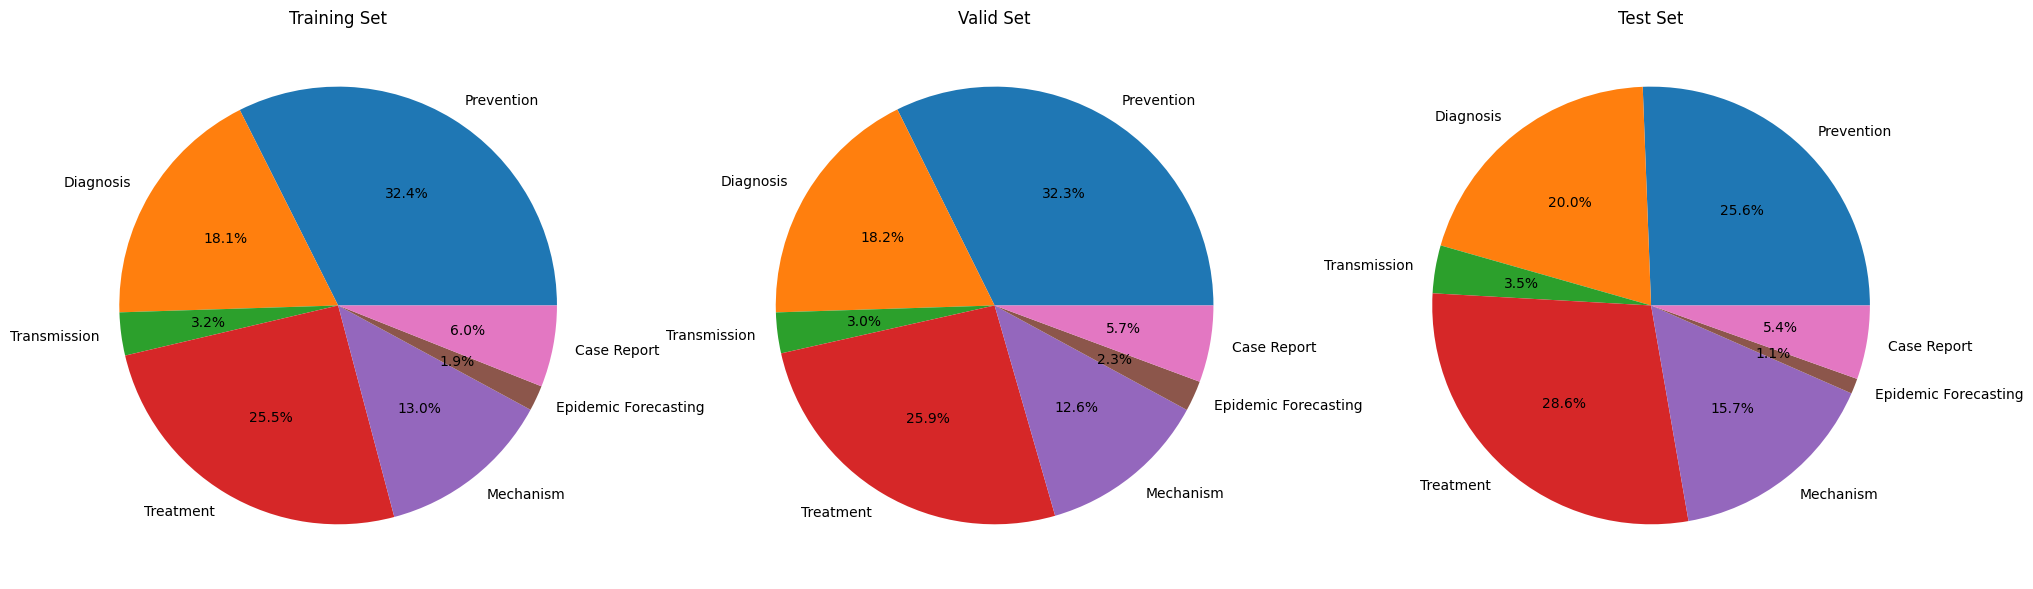

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

axs[0].pie(trainSum, labels = trainSum.index,autopct='%1.1f%%')
axs[0].set_title('Training Set')

axs[1].pie(validSum, labels = validSum.index, autopct='%1.1f%%')
axs[1].set_title('Valid Set')

axs[2].pie(testSum, labels = testSum.index, autopct='%1.1f%%')
axs[2].set_title('Test Set')

plt.show()

In [ ]:
traindf = trainDf.loc[0:1000].copy()
traindf.shape

(1001, 16)

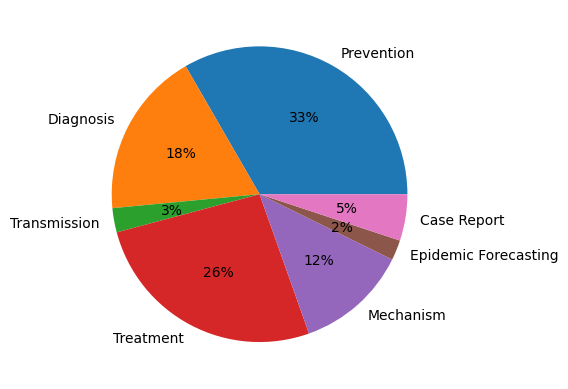

In [ ]:
trainSum = traindf[class_labels].sum()
plt.pie(trainSum, labels = trainSum.index, autopct='%.0f%%')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# trainDf['tokenized'] = np.NaN
# trainDf['tokenized'] = trainDf['tokenized'].astype('object')
# trainDf['tokens'] = 0
# trainDf['token_types'] = 0
# trainDf['lexical_diversity'] = 0.0


# for index, row in trainDf.iterrows():
#     text = word_tokenize(row['abstract'])
#     token = len(text)
#     token_type = len(set(text))
#     diversity = token_type/token
#     trainDf.at[index,'tokens'] = token
#     trainDf.at[index,'token_types'] = token_type
#     trainDf.at[index,'lexical_diversity'] = diversity


In [ ]:
traindf.dtypes

pmid                     int64
journal                 object
title                   object
abstract                object
keywords                object
pub_type                object
authors                 object
doi                     object
label                   object
Prevention               int64
Diagnosis                int64
Transmission             int64
Treatment                int64
Mechanism                int64
Epidemic Forecasting     int64
Case Report              int64
dtype: object

In [ ]:
traindf['journal'] = traindf['journal'].astype(str)
traindf['title'] = traindf['title'].astype(str)
traindf['abstract'] = traindf['abstract'].astype(str)
traindf['keywords'] = traindf['keywords'].astype(str)
traindf['label'] = traindf['label'].astype(str)


traindf['journal'] = traindf['journal'].apply(str)
traindf['title'] = traindf['title'].apply(str)
traindf['abstract'] = traindf['abstract'].apply(str)
traindf['keywords'] = traindf['keywords'].apply(str)
traindf['label'] = traindf['label'].apply(str)

traindf['journal'] = traindf['journal'].astype('string')
traindf['title'] = traindf['title'].astype('string')
traindf['abstract'] = traindf['abstract'].astype('string')
traindf['keywords'] = traindf['keywords'].astype('string')
traindf['label'] = traindf['label'].astype('string')


In [ ]:
traindf.isnull().sum()

pmid                     0
journal                  0
title                    0
abstract                 0
keywords                 0
pub_type                 0
authors                  2
doi                     20
label                    0
Prevention               0
Diagnosis                0
Transmission             0
Treatment                0
Mechanism                0
Epidemic Forecasting     0
Case Report              0
dtype: int64

In [ ]:
traindf.loc[traindf['keywords'] == '<NA>', 'keywords'] = ''
traindf.loc[traindf['keywords'] == 'nan', 'keywords'] = ''

In [ ]:
traindf['keywords'].head()

0    covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...
1    covid-19;coronavirus;dietary therapy;herbal me...
2    cerebrospinal fluid;igg;manic-like symptoms;sa...
3    dental education;dental public health;infectio...
4                                                     
Name: keywords, dtype: string

In [ ]:
traindf['allText'] = traindf.apply(lambda x: '. '.join(filter(None, [x['title'], x['keywords'], x['abstract']])), axis=1)

In [ ]:
traindf.head()

,pmid,journal,title,abstract,keywords,pub_type,authors,doi,label,Prevention,Diagnosis,Transmission,Treatment,Mechanism,Epidemic Forecasting,Case Report,allText
0,32519164,J Thromb Thrombolysis,Potential role for tissue factor in the pathog...,"In December 2019, a new and highly contagious ...",covid-19;il-6;sars-cov-2;tnf-alpha;thrombosis;...,Journal Article;Review,"Bautista-Vargas, Mario;Bonilla-Abadia, Fabio;C...",10.1007/s11239-020-02172-x,Treatment;Mechanism,0,0,0,1,1,0,0,Potential role for tissue factor in the pathog...
1,32691006,J Tradit Complement Med,Dietary therapy and herbal medicine for COVID-...,"A novel coronavirus disease (COVID-19), transm...",covid-19;coronavirus;dietary therapy;herbal me...,Journal Article;Review,"Panyod, Suraphan;Ho, Chi-Tang;Sheen, Lee-Yan",10.1016/j.jtcme.2020.05.004,Treatment;Prevention,1,0,0,1,0,0,0,Dietary therapy and herbal medicine for COVID-...
2,32858315,J Affect Disord,First report of manic-like symptoms in a COVID...,"BACKGROUND: In December 2019, the novel corona...",cerebrospinal fluid;igg;manic-like symptoms;sa...,Case Reports;Journal Article,"Lu, Shaojia;Wei, Ning;Jiang, Jiajun;Wu, Lingli...",10.1016/j.jad.2020.08.031,Case Report,0,0,0,0,0,0,1,First report of manic-like symptoms in a COVID...
3,32985329,J Dent Res,Epidemiological Investigation of OHCWs with CO...,During the coronavirus disease 2019 (COVID-19)...,dental education;dental public health;infectio...,"Journal Article;Research Support, Non-U.S. Gov't","Meng, L;Ma, B;Cheng, Y;Bian, Z",10.1177/0022034520962087,Prevention,1,0,0,0,0,0,0,Epidemiological Investigation of OHCWs with CO...
4,32812051,J Antimicrob Chemother,The impact of sofosbuvir/daclatasvir or ribavi...,OBJECTIVES: Sofosbuvir and daclatasvir are dir...,,Journal Article;Randomized Controlled Trial;Re...,"Eslami, Gholamali;Mousaviasl, Sajedeh;Radmanes...",10.1093/jac/dkaa331,Treatment,0,0,0,1,0,0,0,The impact of sofosbuvir/daclatasvir or ribavi...


In [ ]:
# traindf['tokenized'] = np.NaN
# traindf['tokenized'] = traindf['tokenized'].astype('object')
# traindf['tokens'] = 0
# traindf['token_types'] = 0
# traindf['lexical_diversity'] = 0.0


# for index, row in traindf.iterrows():
#     text = word_tokenize(row['abstract'])
#     token = len(text)
#     token_type = len(set(text))
#     diversity = token_type/token
#     traindf.at[index,'tokens'] = token
#     traindf.at[index,'token_types'] = token_type
#     traindf.at[index,'lexical_diversity'] = diversity


In [ ]:
traindf['tokenized'] = np.NaN
traindf['tokenized'] = traindf['tokenized'].astype('object')
traindf['tokens'] = 0
traindf['token_types'] = 0
traindf['lexical_diversity'] = 0.0

In [ ]:
traindf.isnull().sum()

pmid                       0
journal                    0
title                      0
abstract                   0
keywords                   0
pub_type                   0
authors                    2
doi                       20
label                      0
Prevention                 0
Diagnosis                  0
Transmission               0
Treatment                  0
Mechanism                  0
Epidemic Forecasting       0
Case Report                0
allText                    0
tokenized               1001
tokens                     0
token_types                0
lexical_diversity          0
dtype: int64

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

def lemmatize_tokens(tokens, lemmatizer):
    lemmatized = []
    for token in tokens:
        lemmatized.append(lemmatizer.lemmatize(token))
    return lemmatized


tokenize_index = 0

def tokenize(text):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    #stemmed_tokens = stem_tokens(tokens, stemmer)

    global tokenize_index

    # token = len(text)
    # token_type = len(set(text))
    # diversity = token_type/token
    # traindf.at[tokenize_index,'tokens'] = token
    # traindf.at[tokenize_index,'token_types'] = token_type
    # traindf.at[tokenize_index,'lexical_diversity'] = diversity
    # tokenize_index = tokenize_index + 1


    lemmatized_tokens = lemmatize_tokens(tokens, lemmatizer)
    #return stemmed_tokens

    return lemmatized_tokens

vectorizer = CountVectorizer(tokenizer=tokenize, stop_words='english')

corpus = traindf['allText'].copy()
train_vector = vectorizer.fit_transform(corpus)
# # The transformed data is stored in a sparse matrix X
# print(X.toarray())


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [ ]:
traindf.isnull().sum()

pmid                    1113
journal                 1113
title                   1113
abstract                1113
keywords                1113
pub_type                1113
authors                 1115
doi                     1133
label                   1113
Prevention              1113
Diagnosis               1113
Transmission            1113
Treatment               1113
Mechanism               1113
Epidemic Forecasting    1113
Case Report             1113
allText                 1113
tokenized               2114
tokens                     0
token_types                0
lexical_diversity          0
dtype: int64

In [ ]:
myDict = {}
for label in class_labels:
    grouped = traindf[traindf[label] == 1]
    token = grouped['tokens'].median()
    token_type = grouped['token_types'].median()
    diversity = grouped['lexical_diversity'].median()

    myDict[label] = [token, token_type, diversity]

In [ ]:
df = pd.DataFrame.from_dict(myDict)
df.index = ['tokens', 'token_types', 'lexical_diversity']

In [ ]:
df

,Prevention,Diagnosis,Transmission,Treatment,Mechanism,Epidemic Forecasting,Case Report
tokens,1511.000000,1522.000000,1458.000000,1510.000000,1526.000000,1564.000000,1539.000000
token_types,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
lexical_diversity,0.025955,0.025946,0.026615,0.026033,0.025816,0.025532,0.025682


In [ ]:
myDict1 = {}
for label in class_labels:
    grouped = traindf[traindf[label] == 1]
    text = []
    for index, row in grouped.iterrows():
        text = text + word_tokenize(row['abstract'])
    myDict1[label] = text

In [ ]:
len(myDict1['Prevention'])

1030090

In [ ]:
from nltk.corpus import stopwords
import string

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def labels_words_list(label):
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = myDict1[label]

    cleaned_tokens = []
    for token in tokens:
        token = token.lower()
        if token not in stop_words and token not in string.punctuation:
            cleaned_tokens.append(token)


    fdist = nltk.FreqDist(cleaned_tokens)

    sorted_freq_dist = sorted(fdist.items(), key=lambda x: x[1], reverse=True)

    return list(sorted_freq_dist[:10])

In [ ]:
words_list_to_plot = []
for label in class_labels:
    words_list_to_plot.append(labels_words_list(label))


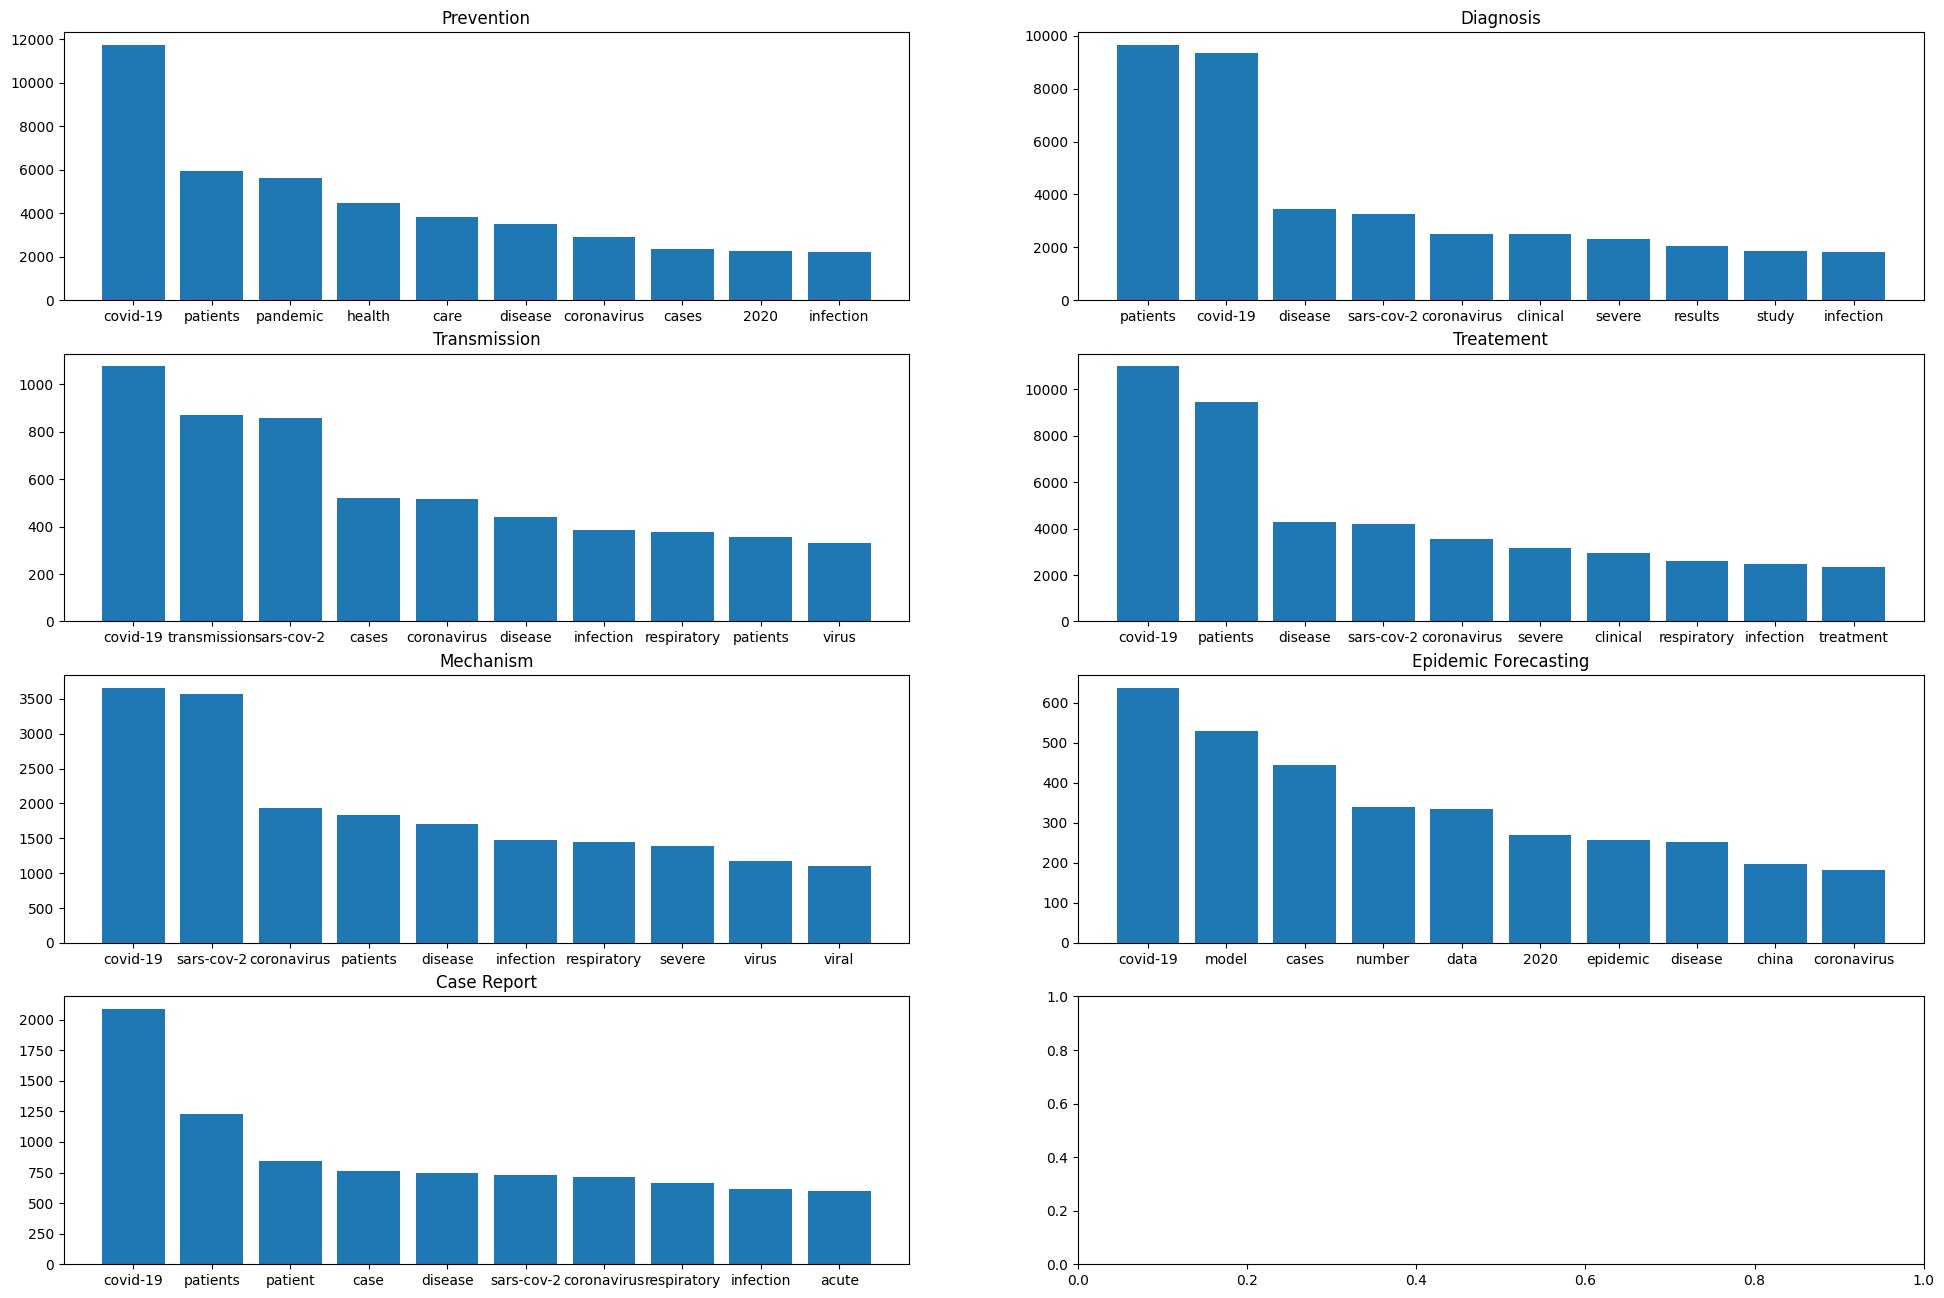

In [ ]:
def get_words_values(l):
    return [row[0] for row in l], [row[1] for row in l]

fig, axs = plt.subplots(4, 2, figsize=(24, 16))

words_l, values_l = get_words_values(words_list_to_plot[0])
axs[0,0].bar(words_l, values_l)
axs[0,0].set_title("Prevention")

words_l, values_l = get_words_values(words_list_to_plot[1])
axs[0,1].bar(words_l, values_l)
axs[0,1].set_title("Diagnosis")

words_l, values_l = get_words_values(words_list_to_plot[2])
axs[1,0].bar(words_l, values_l)
axs[1,0].set_title("Transmission")

words_l, values_l = get_words_values(words_list_to_plot[3])
axs[1,1].bar(words_l, values_l)
axs[1,1].set_title("Treatement")

words_l, values_l = get_words_values(words_list_to_plot[4])
axs[2,0].bar(words_l, values_l)
axs[2,0].set_title("Mechanism")

words_l, values_l = get_words_values(words_list_to_plot[5])
axs[2,1].bar(words_l, values_l)
axs[2,1].set_title("Epidemic Forecasting")

words_l, values_l = get_words_values(words_list_to_plot[6])
axs[3,0].bar(words_l, values_l)
axs[3,0].set_title("Case Report")

plt.show()

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, hamming_loss
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:


def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

def lemmatize_tokens(tokens, lemmatizer):
    lemmatized = []
    for token in tokens:
        lemmatized.append(lemmatizer.lemmatize(token))
    return lemmatized



def tokenize(text):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    #stemmed_tokens = stem_tokens(tokens, stemmer)
    lemmatized_tokens = lemmatize_tokens(tokens, lemmatizer)
    #return stemmed_tokens

    return lemmatized_tokens

In [ ]:
nb_scores = []
lr_scores = []
for label in class_labels:
    X_train, X_test, y_train, y_test = train_test_split(traindf['allText'], traindf[label], test_size=0.2, random_state=42)


    vectorizer = CountVectorizer(tokenizer=tokenize, stop_words='english')
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)


    clf = LogisticRegression(max_iter=100000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    lr_scores.append([f1, f1_micro, f1_macro])



    cly = MultinomialNB(force_alpha=True)
    cly.fit(X_train, y_train)
    y_pred = cly.predict(X_test)

    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    nb_scores.append([f1, f1_micro, f1_macro])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'to

In [ ]:
print(lr_scores)
print(nb_scores)


[[0.9202383145998403, 0.9203980099502488, 0.917283950617284], [0.8317038380125008, 0.835820895522388, 0.7946503204235162], [0.9826440317496488, 0.9850746268656716, 0.8295165394402035], [0.8848952611663522, 0.8855721393034826, 0.8697783161037718], [0.9069047551615737, 0.9104477611940298, 0.8283681214421252], [0.9900497512437811, 0.9900497512437811, 0.8724619289340101], [0.9113230145568454, 0.9303482587064678, 0.6898148148148149]]
[[0.9304727130124342, 0.9303482587064678, 0.9281703083520523], [0.8281563672863751, 0.8308457711442786, 0.7918494152046783], [0.9554500226142018, 0.9701492537313433, 0.49242424242424243], [0.8530361757105942, 0.8507462686567164, 0.8376937984496124], [0.944946907254771, 0.945273631840796, 0.9014925373134329], [0.9702492562314057, 0.9800995024875622, 0.4949748743718593], [0.8830761826413489, 0.9154228855721394, 0.572928383952006]]


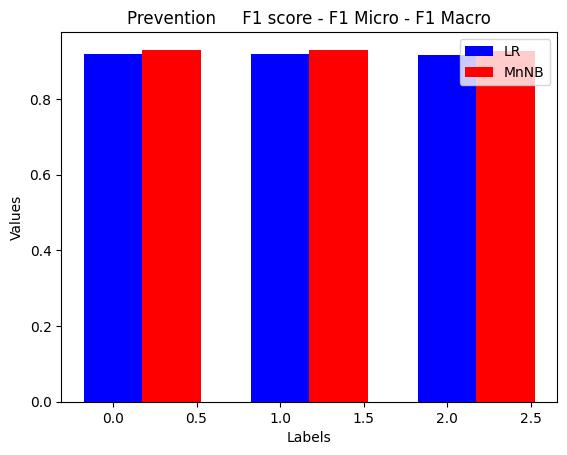

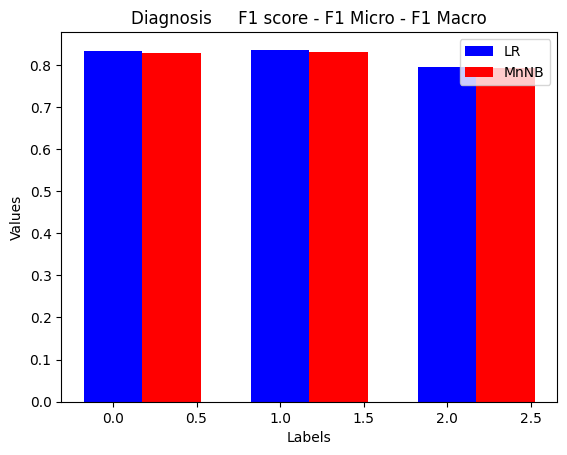

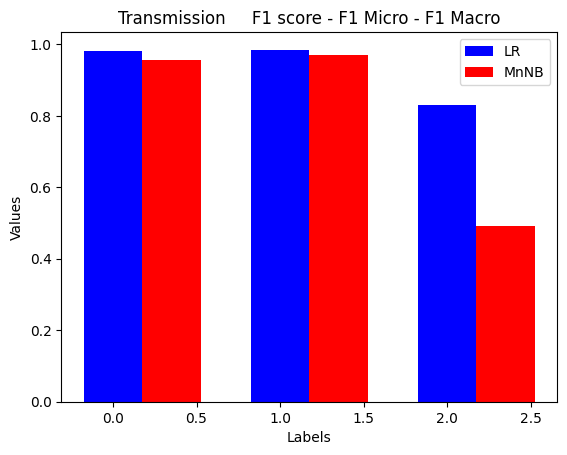

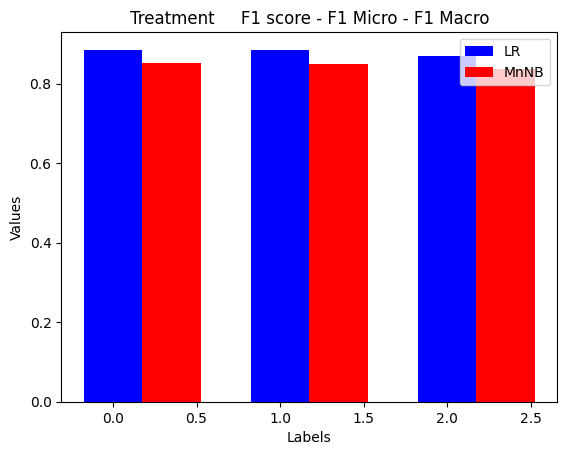

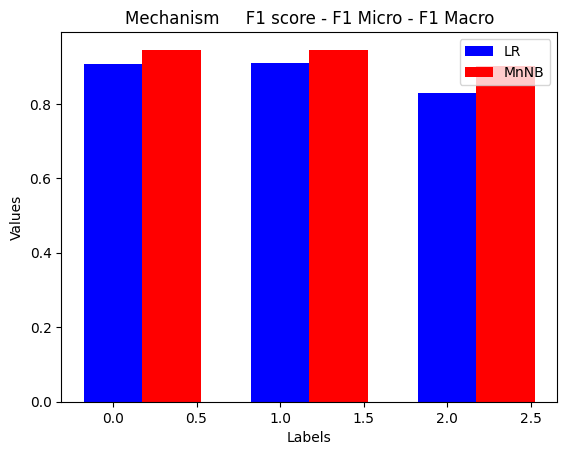

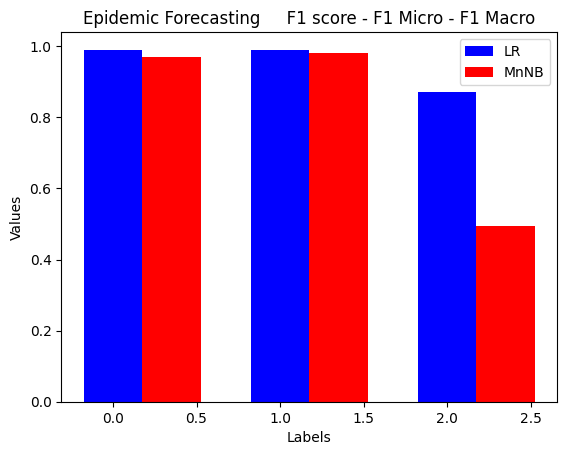

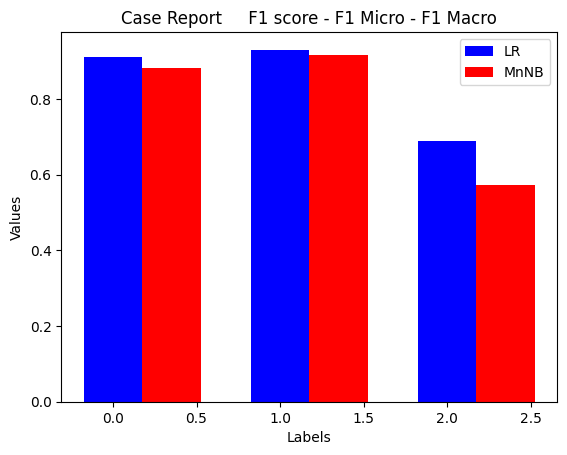

In [ ]:
from numpy.lib.index_tricks import index_exp
for index, label in enumerate(class_labels):
        labels = ['A', 'B', 'C']
        values1 = lr_scores[index]
        values2 = nb_scores[index]

        # Set the width of the bars
        bar_width = 0.35

        # Calculate the position of the bars on the x-axis
        r1 = np.arange(len(labels))
        r2 = [x + bar_width for x in r1]

        # Create the barplot
        plt.bar(r1, values1, color='blue', width=bar_width, label='LR')
        plt.bar(r2, values2, color='red', width=bar_width, label='MnNB')

        new_labels = ['F1 score', 'F1 micro', 'F1 macro','F1 score', 'F1 micro', 'F1 macro']
        # Add x-axis and y-axis labels and title
        plt.xlabel('Labels')
        plt.ylabel('Values')
        plt.title(label+'     F1 score - F1 Micro - F1 Macro')



        # Add legend
        plt.legend()

        # Show the plot
        plt.show()

In [ ]:
sum_f1 = 0
sum_micro_f1 = 0
sum_macro_f1 = 0

for row in lr_scores:
    sum_f1 += row [0]
    sum_micro_f1 += row [1]
    sum_macro_f1 += row [2]

lr_list = [sum_f1/7, sum_micro_f1/7, sum_macro_f1/7]

In [ ]:
sum_f1 = 0
sum_micro_f1 = 0
sum_macro_f1 = 0

for row in nb_scores:
    sum_f1 += row [0]
    sum_micro_f1 += row [1]
    sum_macro_f1 += row [2]

nb_list = [sum_f1/7, sum_micro_f1/7, sum_macro_f1/7]

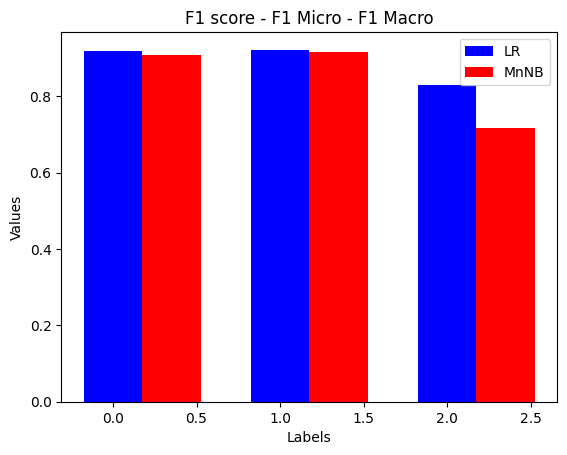

In [ ]:
labels = ['A', 'B', 'C']
values1 = lr_list
values2 = nb_list

# Set the width of the bars
bar_width = 0.35

# Calculate the position of the bars on the x-axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

# Create the barplot
plt.bar(r1, values1, color='blue', width=bar_width, label='LR')
plt.bar(r2, values2, color='red', width=bar_width, label='MnNB')

new_labels = ['F1 score', 'F1 micro', 'F1 macro','F1 score', 'F1 micro', 'F1 macro']
# Add x-axis and y-axis labels and title
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('F1 score - F1 Micro - F1 Macro')



# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
lr_list

[0.9182512809272202, 0.9225302061122955, 0.8288391416822466]

In [ ]:
nb_list

[0.9093410892501615, 0.9175550817341863, 0.7170762228668405]

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance

<function str.index>

In [ ]:
svm_scores = []
x_test_list =[]
y_test_list =[]
y_pred_list = []


for label in class_labels:
    X_train, X_test, y_train, y_test = train_test_split(traindf['allText'], traindf[label], test_size=0.2, random_state=42)

    x_test_list.append(X_test)
    y_test_list.append(y_test)


    vectorizer = CountVectorizer(tokenizer=tokenize, stop_words='english')
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)



    clf = SVC(kernel='rbf')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_list.append(y_pred)

    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred)
    svm_scores.append([f1, f1_micro, f1_macro, precision, recall, conf_mat, auroc])




/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'to

In [ ]:
my_array1 = np.array(y_test_list)
my_array2 = np.array(y_pred_list)
my_array = np.array(x_test_list)


In [ ]:
for i in range(len(my_array)):
    for j in range(len(my_array[0])):
        if (my_array1[i][j] == 1 and my_array2[i][j] == 0):
            print(i)
            print('\n')
            print(my_array[i][j])
            print("-------------------------------------------------------------")

0


Care of the pregnant woman with coronavirus disease 2019 in labor and delivery: anesthesia, emergency cesarean delivery, differential diagnosis in the acutely ill parturient, care of the newborn, and protection of the healthcare personnel.. ace2;ards;covid-19;mers;sars;sars-cov-2;acute respiratory distress syndrome;acutely ill;coronavirus;coronavirus disease 2019;maternal morbidity;obstetric management;pandemic;pregnancy;severe acute respiratory syndrome;vertical transmission;virus. Coronavirus disease 2019, caused by the severe acute respiratory syndrome coronavirus 2, has been declared a pandemic by the World Health Organization. As the pandemic evolves rapidly, there are data emerging to suggest that pregnant women diagnosed as having coronavirus disease 2019 can have severe morbidities (up to 9%). This is in contrast to earlier data that showed good maternal and neonatal outcomes. Clinical manifestations of coronavirus disease 2019 include features of acute respiratory illnesse

In [ ]:
f1 = 0
f1_micro= 0
f1_macro= 0
precision= 0
recall= 0
conf_mat= 0
auroc= 0
for i in range(7):
    f1 += svm_scores[i][0]
    f1_micro += svm_scores[i][1]
    f1_macro += svm_scores[i][2]
    precision += svm_scores[i][3]
    recall = recall + svm_scores[i][4]
    if (i == 0):
        conf_mat = np.array(svm_scores[i][5])
    else:
        conf_mat += np.array(svm_scores[i][5])

    auroc= svm_scores[i][6]

In [ ]:
f1 = f1/7
f1_micro= f1_micro/ 7
f1_macro = f1_macro/7
precision = precision/ 7
recall= recall / 7
conf_mat = conf_mat/ 7.0
auroc=auroc/ 7

In [ ]:
print(f1)
print(f1_micro)
print(f1_macro)
print(precision)
print(recall)
print(auroc)


0.8864252852869206
0.9033404406538734
0.6657761576972943
0.5214955775931386
0.3364802855980398
0.07142857142857142


In [ ]:
import seaborn as sns
def fmt(x):
    return '{:.0f}'.format(x)

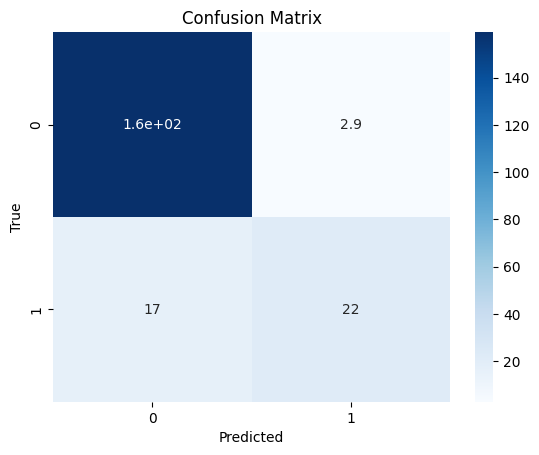

In [ ]:
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



In [ ]:
conf_mat

array([[159.28571429,   2.85714286],
       [ 16.57142857,  22.28571429]])